In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import random
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Dataset\df.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,sum,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,4,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15


In [3]:
df.shape

(4920, 135)

,missing_value,%
itching,0,0.0
skin_rash,0,0.0
nodal_skin_eruptions,0,0.0
continuous_sneezing,0,0.0
shivering,0,0.0
...,...,...
red_sore_around_nose,0,0.0
yellow_crust_ooze,0,0.0
prognosis,0,0.0
sum,0,0.0


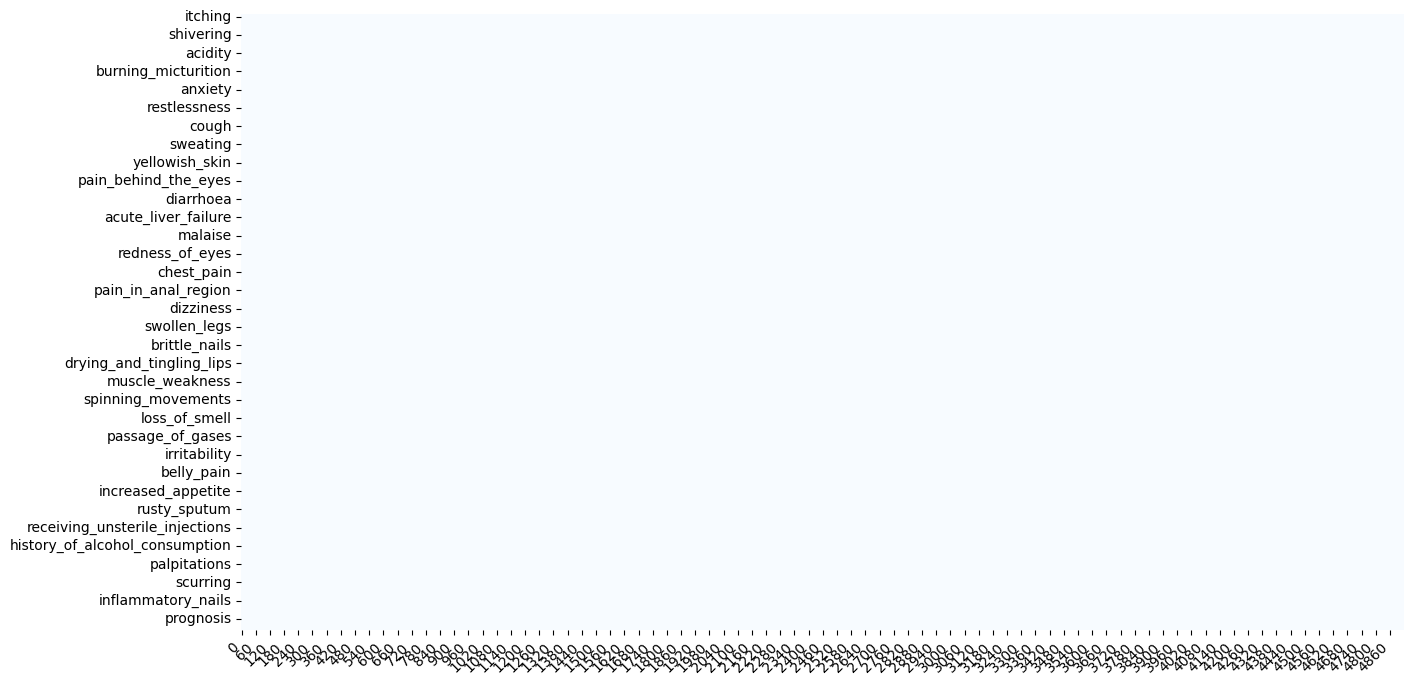

In [4]:
# Plot Missing Value
# !pip install jcopml
from jcopml.plot import plot_missing_value
plot_missing_value(df, return_df = True)

In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,sum,class_prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,7.448780,20.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,3.592166,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,40.000000


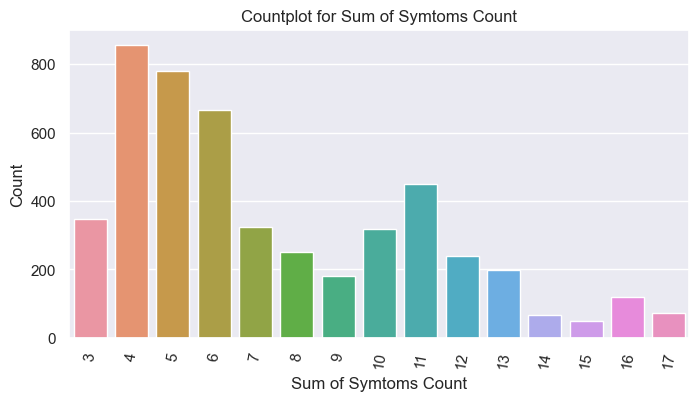

In [6]:
#df['sum'].value_counts()
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(data=df, x="sum") 
plt.title('Countplot for Sum of Symtoms Count')
plt.xlabel('Sum of Symtoms Count')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

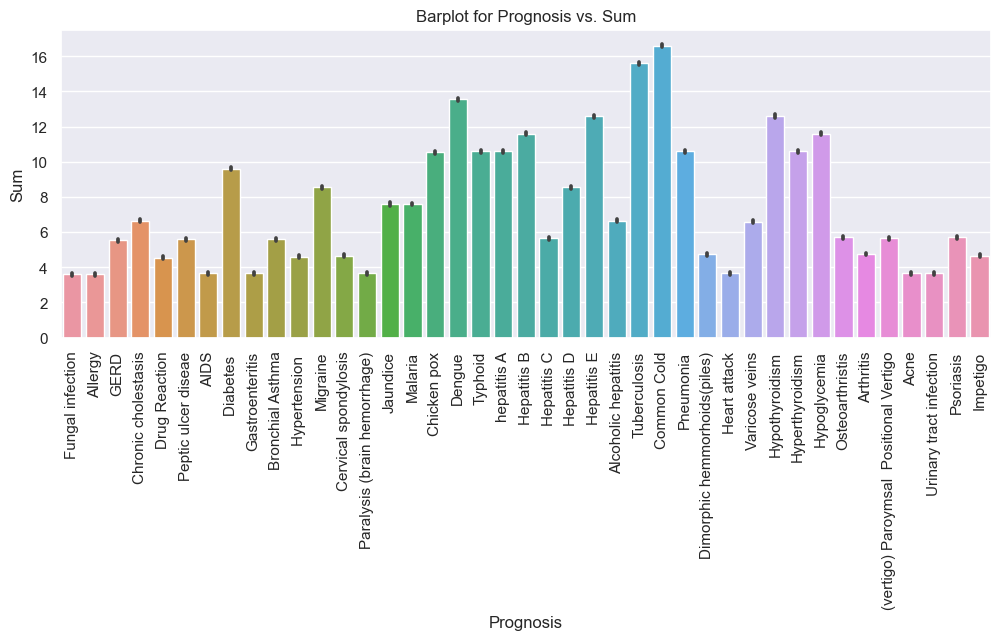

In [7]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(data=df, x="prognosis", y="sum")
plt.title('Barplot for Prognosis vs. Sum')
plt.xlabel('Prognosis')
plt.ylabel('Sum')
plt.xticks(rotation=90)
plt.show()

In [8]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['class_prognosis'] = le.fit_transform(df['prognosis'])
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,sum,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,4,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15


In [9]:
print(sorted(list(df['class_prognosis'].unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [10]:
df['class_prognosis'].value_counts()

15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: class_prognosis, dtype: int64

In [11]:
# Drop unwanted columns
df = df.drop(['prognosis','sum'], axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [12]:
X, Y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [13]:
X_train, X_test

(      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
 2585        0          0                     0                    0   
 1917        0          0                     0                    0   
 1010        0          0                     0                    0   
 172         0          1                     0                    0   
 1591        0          0                     0                    0   
 ...       ...        ...                   ...                  ...   
 1288        0          0                     0                    0   
 2205        0          0                     0                    0   
 2499        0          1                     0                    0   
 4697        0          0                     0                    0   
 4465        0          1                     0                    0   
 
       shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
 2585          0       0           0             1   

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_X_train = scaler.fit_transform(X_train)
print(scaled_X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_Classifier = RandomForestClassifier()

rf_Classifier.fit(scaled_X_train, y_train)  

RandomForestClassifier()

In [16]:
scaled_X_test = scaler.transform(X_test)

y_pred = rf_Classifier.predict(scaled_X_test)
y_pred, le.inverse_transform(y_pred)

(array([24, 10, 21, ..., 34, 31,  5]),
 array(['Hyperthyroidism', 'Common Cold', 'Hepatitis D', ..., 'Pneumonia',
        'Osteoarthristis', 'Arthritis'], dtype=object))

Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00     

<Axes: >

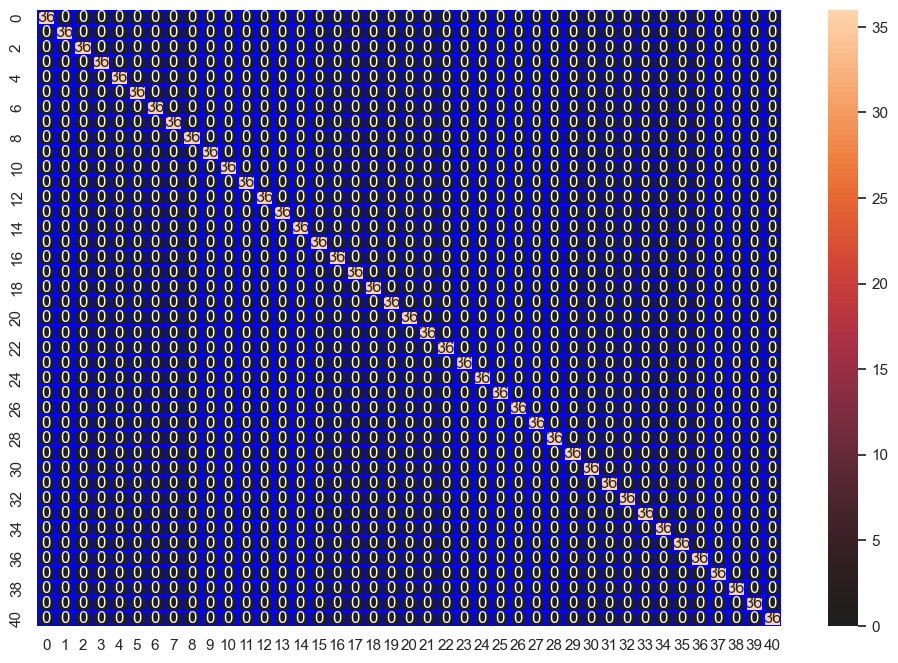

In [17]:
print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(12,8) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,
            linewidths = 2,
            linecolor = "blue",
            center=0)

In [19]:
def run_pipeline(X_train, X_test, y_train, y_test, scaler, classifier):
    # process 1 : fit and transform X_train data
    scaled_X_train = scaler.fit_transform(X_train)
    
    # process 2 : train model
    classifier.fit(scaled_X_train, y_train)  
    
    # process 3 : transform X_test data
    scaled_X_test = scaler.transform(X_test)
    
    # process 4 : test model
    y_pred = rf_Classifier.predict(scaled_X_test)
    # print(y_pred, le.inverse_transform(y_pred))
    
    # process 5 : model evalution
    print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')
    print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
    print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')
    print("Classification_report:\n",metrics.classification_report(y_test, y_pred))
    print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
    # plot confusion_matrix
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8) # WH
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                linewidths = 2,
                linecolor = "blue",
                center=0)
